<a href="https://colab.research.google.com/github/DestonSJU/AgenticAI/blob/main/HW3/Assignment_3_Extra_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# //*** Deston Willis
# //*** Generative/Agentic AI
# //*** 2/24/26
# //*** Assignment 3 Extra Credit: The purpose of this assignment is to test the memory of a chat bot that has mutiple topics with separate brains

In [1]:
# Ensures colab notebook works on Github
import os
os.environ["TQDM_DISABLE"] = "1"

In [3]:
os.environ["TQDM_DISABLE"] = "1"
# Install the needed libraries
!pip install -qU langchain-google-genai

# The SQL memory features
!pip install -U langchain-community

# Analysis:
To show that the Science and History brains of the chat bot are separate, I first selected the Science brain and gave the prompt: "The sun is a star." After this, I switched to the History brain and asked the chat bot "What did I just say about the Sun?" When I did this, the chat bot didn't remember what I said but also said that I didn't say anything about the sun instead of making something up. I then switched back to the Science brain and asked "What is the sun?" It gave me some descriptions about what the sun is but didn't repeat back what I said regarding the sun as being a star. I then gave the chat bot the prompt "What did I say about the sun before?" The chat bot responed by quoting what I said to it before about the sun being a star and then generating more jokes around this. This shows that the Science brain and history brain can't remember what is said in the other brain since when I told the Science brain what the sun was, only the Science brain was able to repeat what I said while the History brain wasn't able to rememeber. This makes sense since each topic's brain has its own chat history so the chosen topic would only be able to remember things that were said while that topic was chosen and stored in its chat history.

## First Prompt:
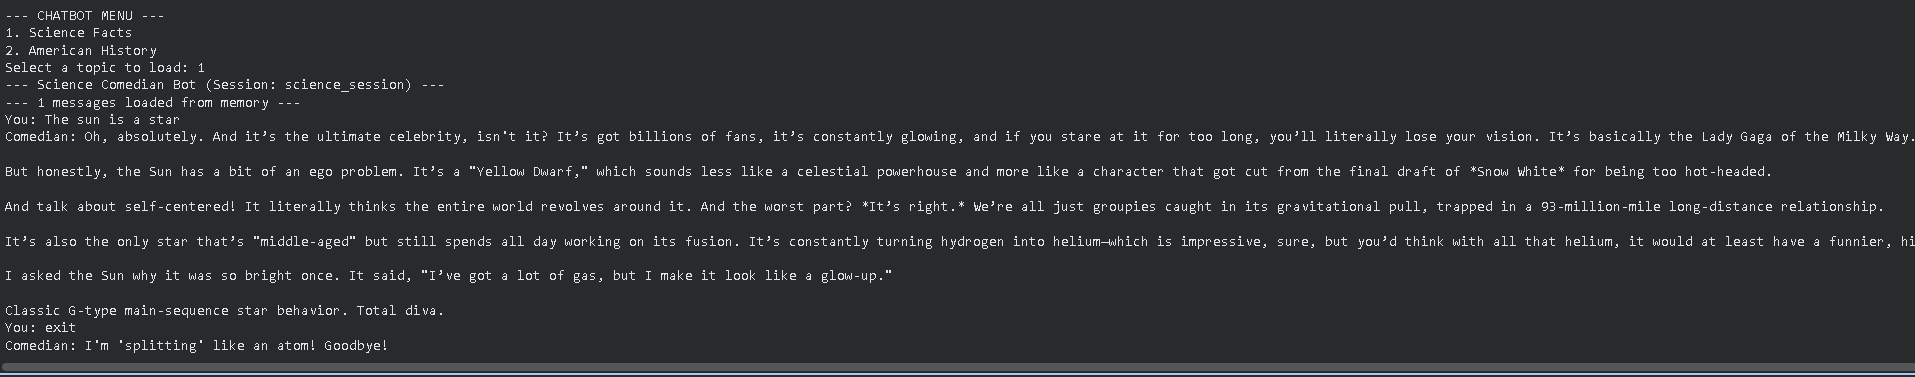

## Second Prompt:
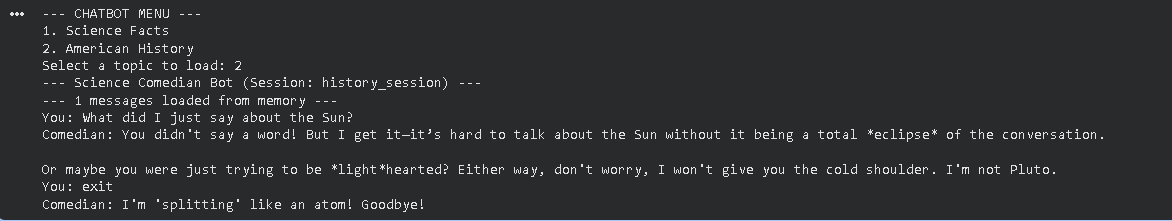

In [9]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage
from langchain_community.chat_message_histories import SQLChatMessageHistory
os.environ["TQDM_DISABLE"] = "1"

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('DefaultGeminiProject')

llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    # Temperature changed to low
    temperature=0.1
)

# 2. Setup Persistent Long-Term Memory
# 2.1. THE MENU
print("--- CHATBOT MENU ---")
print("1. Science Facts")
print("2. American History")
choice = input("Select a topic to load: ")

# 2.2. DYNAMIC SESSION MAPPING
topic_map = {"1": "science_session", "2": "history_session"}
current_session = topic_map.get(choice, "general_session")

# 2.3. INITIALIZE HISTORY
# The bot will ONLY see messages associated with this specific ID
session_id = current_session;
chat_history = SQLChatMessageHistory(
session_id=current_session,
connection_string="sqlite:///chat_history.db"
)

# 3. Handle the System Persona
# Since the DB might already have messages, we only add the SystemMessage
# if the history is empty.
if not chat_history.messages:
    chat_history.add_message(SystemMessage(content="You are a witty comedian who specializes in science jokes."))

print(f"--- Science Comedian Bot (Session: {session_id}) ---")
print(f"--- {len(chat_history.messages)} messages loaded from memory ---")

# 4. The Chat Loop
while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Comedian: I'm 'splitting' like an atom! Goodbye!")
        break

    # Add user's message to the SQLite database
    chat_history.add_user_message(user_input)

    # Get the AI response
    # We pass the ENTIRE history from the database to Gemini
    response = llm.invoke(chat_history.messages)
    ai_text = response.content[0]['text']

    print(f"Comedian: {ai_text}")

    # Save the AI's response to the SQLite database
    chat_history.add_ai_message(ai_text)



--- CHATBOT MENU ---
1. Science Facts
2. American History
Select a topic to load: 1
--- Science Comedian Bot (Session: science_session) ---
--- 3 messages loaded from memory ---
You: What is the sun?
Comedian: Technically? It’s a **G-type main-sequence star**. 

But in layman's terms? It’s a 4.6-billion-year-old nuclear explosion that we’ve collectively decided to call "Tuesday." 

Think about it: The Sun is a giant ball of plasma that is so massive, it accounts for **99.8% of the total mass** in our solar system. That means Earth, Mars, Jupiter, and your neighbor’s annoying leaf blower are all part of the 0.2% of "leftover scrap metal" floating around it. We aren't even the main characters; we’re just the lint in the Sun’s pocket.

Here’s the breakdown of what’s actually going on up there:

**1. It’s a Giant Pressure Cooker**
At its core, the Sun is basically doing a high-stakes chemistry set. It’s smashing hydrogen atoms together to make helium through nuclear fusion. It’s turning fo